<a href="https://colab.research.google.com/github/Skot1X/ranhdzphytone/blob/main/DZ11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Точность: 0.844


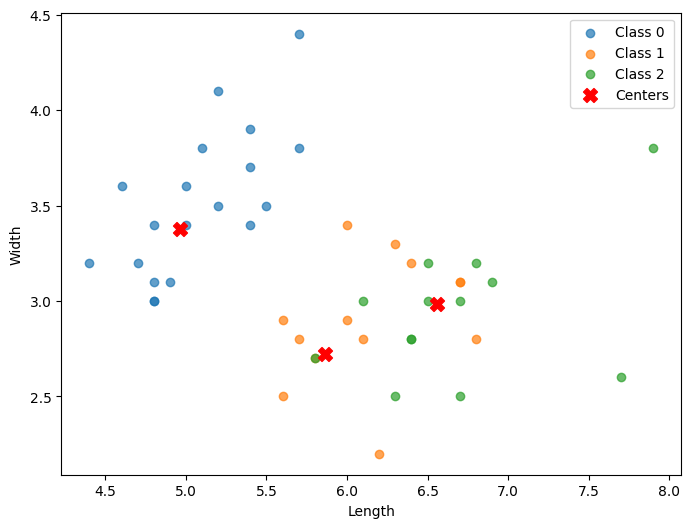

In [8]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score


iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target


X = X[['sepal length (cm)', 'sepal width (cm)']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Точность: {accuracy:.3f}")





plt.figure(figsize=(8,6))
for class_value in np.unique(y_test):
    plt.scatter(X_test[y_test==class_value]['sepal length (cm)'],
                X_test[y_test==class_value]['sepal width (cm)'],
                label=f"Class {class_value}", alpha=0.7)


centers = lda.means_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=100, label='Centers')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()

Кол-во кластеров: 2


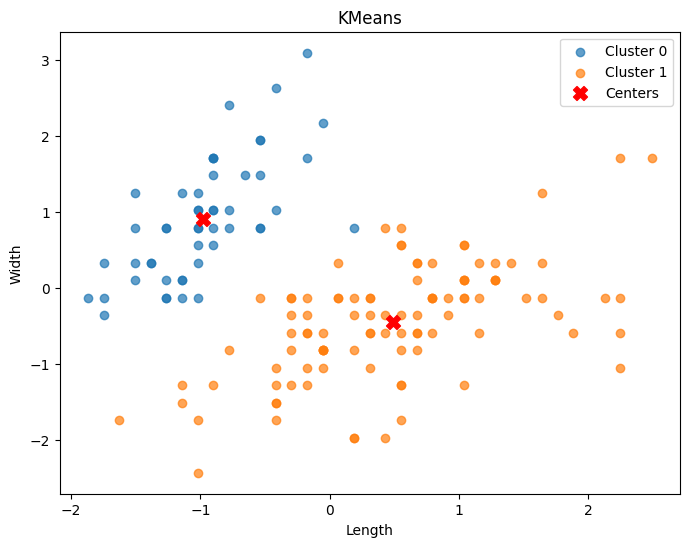

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sil_scores = []
K_range = range(2, 7)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

optimal_k = K_range[np.argmax(sil_scores)]
print(f"Кол-во кластеров: {optimal_k}")


kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X_scaled)
centers = kmeans.cluster_centers_


plt.figure(figsize=(8,6))
for cluster in range(optimal_k):
    plt.scatter(X_scaled[labels==cluster,0], X_scaled[labels==cluster,1], label=f"Cluster {cluster}", alpha=0.7)

plt.scatter(centers[:,0], centers[:,1], c='red', marker='X', s=100, label='Centers')
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('KMeans')
plt.legend()
plt.show()